In [1]:
pip install tensorflow scikit-learn tpot pyFTS

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.1/175.1 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 11.4 MB/s eta 0:00:00
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11939 sha256=d03325d1f2557ac1dff1b162fbfa59998640ef63b3734f948541cc004521a737
  Stored in directory: /root/.cache/pip/wheels/da/77/2d/adbc56bc4db95ad80c6d4e71cd69e2d9d122174904342e3f7f
Successfully built stopit


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

ALL of the Deep model

In [36]:
class TimeSeriesForecaster:
    def __init__(self):
      pass
    # Model Architectures -------------------------------------------------------
    def build_lstm(self,x, y, LSTM_units, epochs, batch_size):
        model = tf.keras.Sequential([
            LSTM(LSTM_units, return_sequences=True, input_shape=(self.x.shape[1], self.x.shape[2])),
            Dropout(0.2),
            LSTM(32),
            Dense(1)
        ])
        model.compile(optimizer=Adam(0.001), loss='mse')
        early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
        history = model.fit(x, y,
                               epochs=epochs,
                               batch_size=batch_size,
                               validation_split=0.2,
                               callbacks=[early_stop],
                               verbose=2)
        pd.DataFrame(history.history).plot(figsize=(5, 5))
        plt.grid(True)
        plt.gca().set_ylim(0, 100) # set the vertical range to [0-1]
        plt.show()
        return model

    def build_gru(self,x, y, GRU_units, epochs, batch_size):
        model = tf.keras.Sequential([
            GRU(GRU_units, return_sequences=True, input_shape=(x.shape[1],x.shape[2])),
            Dropout(0.2),
            GRU(32),
            Dense(1)
        ])
        model.compile(optimizer=Adam(0.001), loss='mse')
        early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
        history = model.fit(x, y,
                               epochs=epochs,
                               batch_size=batch_size,
                               validation_split=0.2,
                               callbacks=[early_stop],
                               verbose=2)
        pd.DataFrame(history.history).plot(figsize=(5, 5))
        plt.grid(True)
        plt.gca().set_ylim(0, 100) # set the vertical range to [0-1]
        plt.show()
        return model

    def build_tcn(self,x, y, convolutional_filters,act, epochs, batch_size):
        input_layer = Input(shape=(x.shape[1], x.shape[2]))
        z = Conv1D(convolutional_filters, kernel_size=2, dilation_rate=1, padding='causal', activation=act)(input_layer)
        z = Conv1D(convolutional_filters, kernel_size=2, dilation_rate=2, padding='causal', activation=act)(z)
        z = Conv1D(convolutional_filters, kernel_size=2, dilation_rate=4, padding='causal', activation=act)(z)
        z = GlobalAveragePooling1D()(z)
        z = Dense(32, activation='relu')(z)
        output_layer = Dense(1)(z)
        model = Model(inputs=input_layer, outputs=output_layer)
        model.compile(optimizer=Adam(0.001), loss='mse')
        early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
        history = model.fit(x, y,
                               epochs=epochs,
                               batch_size=batch_size,
                               validation_split=0.2,
                               callbacks=[early_stop],
                               verbose=2)
        pd.DataFrame(history.history).plot(figsize=(5, 5))
        plt.grid(True)
        plt.gca().set_ylim(0, 100) # set the vertical range to [0-1]
        plt.show()
        return model

    def build_cnn_lstm(self,x, y, convolutional_filters,LSTM_units ,act, epochs, batch_size):
        model = tf.keras.Sequential([
            Conv1D(filters=convolutional_filters, kernel_size=3, activation=act,
                  input_shape=(x.shape[1], x.shape[2])),
            MaxPooling1D(pool_size=2),
            LSTM(LSTM_units, return_sequences=True),
            LSTM(LSTM_units),
            Dense(1)])
        model.compile(optimizer=Adam(0.001), loss='mse')
        early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
        history = model.fit(x, y,
                               epochs=epochs,
                               batch_size=batch_size,
                               validation_split=0.2,
                               callbacks=[early_stop],
                               verbose=2)
        pd.DataFrame(history.history).plot(figsize=(5, 5))
        plt.grid(True)
        plt.gca().set_ylim(0, 100) # set the vertical range to [0-1]
        plt.show()
        return model

    def build_cnn_gru(self,x, y, convolutional_filters,GRU_units ,act, epochs, batch_size):
        model = tf.keras.Sequential([
            Conv1D(filters=64, kernel_size=3, activation=act,
                  input_shape=(x.shape[1], x.shape[2])),
            MaxPooling1D(pool_size=2),
            GRU(GRU_units, return_sequences=True),
            GRU(GRU_units),
            Dense(1)
        ])
        model.compile(optimizer=Adam(0.001), loss='mse')
        early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
        history = model.fit(x, y,
                               epochs=epochs,
                               batch_size=batch_size,
                               validation_split=0.2,
                               callbacks=[early_stop],
                               verbose=2)
        pd.DataFrame(history.history).plot(figsize=(5, 5))
        plt.grid(True)
        plt.gca().set_ylim(0, 100) # set the vertical range to [0-1]
        plt.show()
        return model


    def build_transformer(self,x, y, epochs, batch_size):
        def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
            z = LayerNormalization(epsilon=1e-6)(inputs)
            z = MultiHeadAttention(
                key_dim=head_size, num_heads=num_heads, dropout=dropout
            )(z, z)
            z = Dropout(dropout)(z)
            res = z + inputs

            z = LayerNormalization(epsilon=1e-6)(res)
            z = Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(z)
            z = Dropout(dropout)(z)
            z = Conv1D(filters=inputs.shape[-1], kernel_size=1)(z)
            return z + res

        inputs = Input(shape=(x.shape[1], x.shape[2]))
        z = transformer_encoder(inputs, head_size=32, num_heads=4, ff_dim=64)
        z = GlobalAveragePooling1D()(z)
        outputs = Dense(1)(z)
        model = Model(inputs=inputs, outputs=outputs)
        model.compile(optimizer=Adam(0.001), loss='mse')
        early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
        history = model.fit(x, y,
                               epochs=epochs,
                               batch_size=batch_size,
                               validation_split=0.2,
                               callbacks=[early_stop],
                               verbose=2)
        pd.DataFrame(history.history).plot(figsize=(5, 5))
        plt.grid(True)
        plt.gca().set_ylim(0, 100) # set the vertical range to [0-1]
        plt.show()
        return model

    def build_distilled_rnn(self,x, y, epochs, batch_size):
        teacher_input = Input(shape=(x.shape[1], x.shape[2]))
        z = LSTM(128, return_sequences=True)(teacher_input)
        z = LSTM(64)(z)
        teacher_output = Dense(1)(z)
        teacher = Model(inputs=teacher_input, outputs=teacher_output)

        student_input = Input(shape=(x.shape[1], x.shape[2]))
        x = SimpleRNN(64)(student_input)
        student_output = Dense(1)(z)
        model = Model(inputs=student_input, outputs=student_output)
        model.compile(optimizer=Adam(0.001), loss='mse')
        early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
        history = model.fit(x, y,
                               epochs=epochs,
                               batch_size=batch_size,
                               validation_split=0.2,
                               callbacks=[early_stop],
                               verbose=2)
        pd.DataFrame(history.history).plot(figsize=(5, 5))
        plt.grid(True)
        plt.gca().set_ylim(0, 100) # set the vertical range to [0-1]
        plt.show()
        return model




def plot_predictions(model,x,y_tru):
    if np.ndim(x) == 3:
        pred = model.predict(x)
    else:
        print("The dimensioan of the dataset is not valid")
    plt.figure(figsize=(12, 6))
    plt.plot(np.arange(len(y_tru)), y_tru, label='Actual', alpha=0.7)
    plt.plot(np.arange(len(y_tru)), pred, label='Predicted', alpha=0.7)
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# Utility functions
def validation_testing(x_test, y_test, model):
    if np.ndim(x_test) == 3:
        y_pred = model.predict(x_test)
    else:
        print("The dimensioan of the dataset is not valid")
    print('MSE:', mean_squared_error(y_test, y_pred))
    print('MAE:', mean_absolute_error(y_test, y_pred))
    print('R2 Score:', r2_score(y_test, y_pred))
    print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))
    print('Predictions:', y_pred.flatten())

def Train_test_split(x, y, test_size=0.2, random_state=None):
    X_train, X_test, y_train, y_test = train_test_split(
        x, y, test_size=test_size, random_state=random_state, shuffle=True
    )
    print("Training features size:", X_train.shape)
    print("Testing features size:", X_test.shape)
    print("Training target size:", y_train.shape)
    print("Testing target size:", y_test.shape)
    return X_train, X_test, y_train, y_test




In [32]:
def read_data(path, target : str, features: list):
  _, form= path.split(".")
  if form == "csv":
    df = pd.read_csv(path)
  if form == "xls" or form =="XLS":
     df = pd.read_excel(path)
  data = df[features]
  data3d = np.array(data).reshape(data.shape[0], data.shape[1], 1)
  target =df[target]
  return data3d, target

In [33]:

data, target = read_data('/content/XAU_1d_data_2004_to_2024-09-20 (1).csv','Close', ["High", "Open", "Low"])

In [34]:
X_train, X_test, y_train, y_test = Train_test_split(data, target, 0.3, 21)

Training features size: (3643, 3, 1)
Testing features size: (1562, 3, 1)
Training target size: (3643,)
Testing target size: (1562,)


Epoch 1/50
92/92 - 3s - 31ms/step - loss: 1860248.1250 - val_loss: 1468208.7500
Epoch 2/50
92/92 - 0s - 5ms/step - loss: 494138.0312 - val_loss: 135.4294
Epoch 3/50
92/92 - 0s - 3ms/step - loss: 162.0305 - val_loss: 111.8037
Epoch 4/50
92/92 - 0s - 3ms/step - loss: 85.3345 - val_loss: 110.6413
Epoch 5/50
92/92 - 0s - 3ms/step - loss: 85.0969 - val_loss: 109.3249
Epoch 6/50
92/92 - 0s - 2ms/step - loss: 85.8798 - val_loss: 110.3585
Epoch 7/50
92/92 - 0s - 3ms/step - loss: 85.3170 - val_loss: 111.9121
Epoch 8/50
92/92 - 0s - 3ms/step - loss: 85.0653 - val_loss: 111.6201
Epoch 9/50
92/92 - 0s - 3ms/step - loss: 85.4415 - val_loss: 109.9493
Epoch 10/50
92/92 - 0s - 3ms/step - loss: 85.4857 - val_loss: 112.0088
Epoch 11/50
92/92 - 0s - 3ms/step - loss: 85.5178 - val_loss: 111.9148
Epoch 12/50
92/92 - 0s - 3ms/step - loss: 84.9922 - val_loss: 109.0123
Epoch 13/50
92/92 - 0s - 3ms/step - loss: 85.5237 - val_loss: 109.0933
Epoch 14/50
92/92 - 0s - 3ms/step - loss: 85.5390 - val_loss: 108.9679


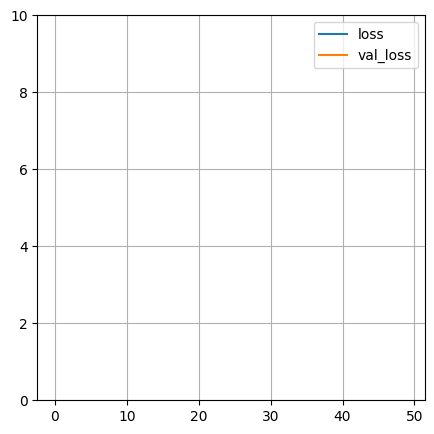

In [22]:
model = TimeSeriesForecaster()
tcn = model.build_tcn(X_train,y_train, 8, "swish", 50, 32)

114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


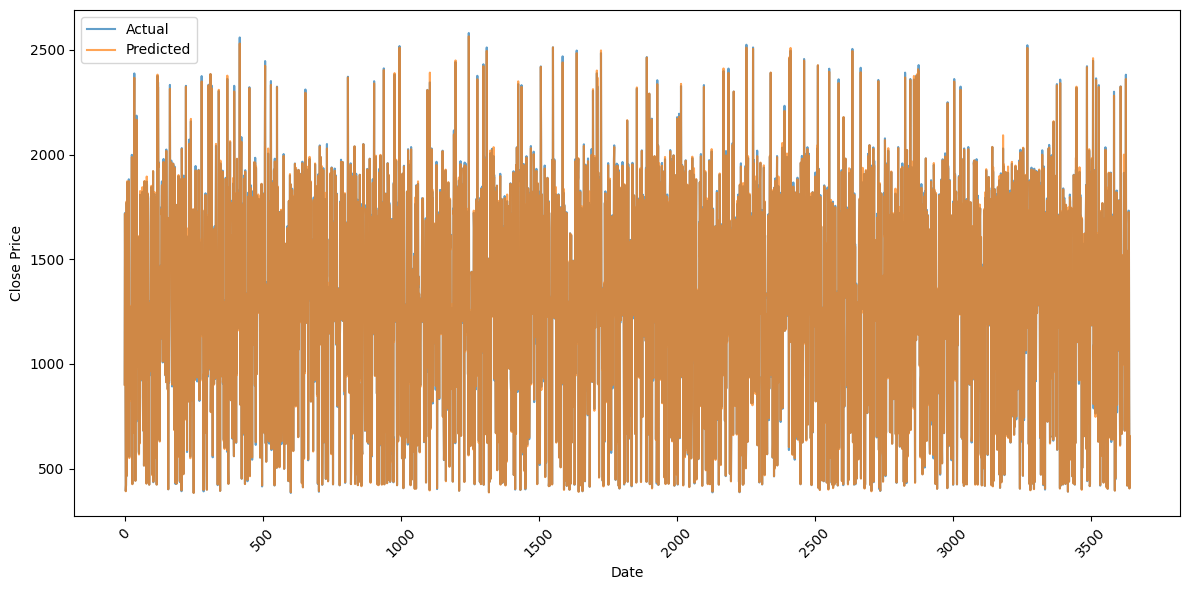

In [35]:
plot_predictions(tcn,X_train,y_train)

In [37]:
validation_testing(X_train,y_train, tcn)

114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
MSE: 90.48584012208224
MAE: 6.522365584267452
R2 Score: 0.999597891069574
MAPE: 0.00515813691922724
Predictions: [ 900.6848  1717.0063  1313.404   ...  818.5211   405.07773  654.8178 ]


Epoch 1/50
92/92 - 4s - 43ms/step - loss: 127492.1172 - val_loss: 83372.2188
Epoch 2/50
92/92 - 0s - 4ms/step - loss: 58383.2109 - val_loss: 34065.7148
Epoch 3/50
92/92 - 0s - 4ms/step - loss: 21559.9785 - val_loss: 10657.2471
Epoch 4/50
92/92 - 0s - 4ms/step - loss: 5946.5835 - val_loss: 2569.6160
Epoch 5/50
92/92 - 0s - 5ms/step - loss: 1452.6963 - val_loss: 813.1051
Epoch 6/50
92/92 - 1s - 7ms/step - loss: 619.6995 - val_loss: 563.4588
Epoch 7/50
92/92 - 1s - 7ms/step - loss: 498.8665 - val_loss: 511.4661
Epoch 8/50
92/92 - 1s - 7ms/step - loss: 459.9573 - val_loss: 476.6811
Epoch 9/50
92/92 - 1s - 6ms/step - loss: 427.1633 - val_loss: 443.2356
Epoch 10/50
92/92 - 0s - 4ms/step - loss: 396.4160 - val_loss: 412.1346
Epoch 11/50
92/92 - 1s - 7ms/step - loss: 367.2863 - val_loss: 382.6325
Epoch 12/50
92/92 - 0s - 4ms/step - loss: 339.8965 - val_loss: 354.8680
Epoch 13/50
92/92 - 1s - 7ms/step - loss: 314.7794 - val_loss: 329.6171
Epoch 14/50
92/92 - 0s - 4ms/step - loss: 291.9738 - val

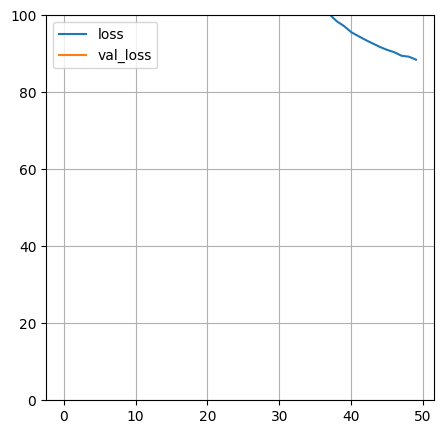

In [38]:
model = TimeSeriesForecaster()
transformer = model.build_transformer(X_train,y_train, 200, 32)

114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


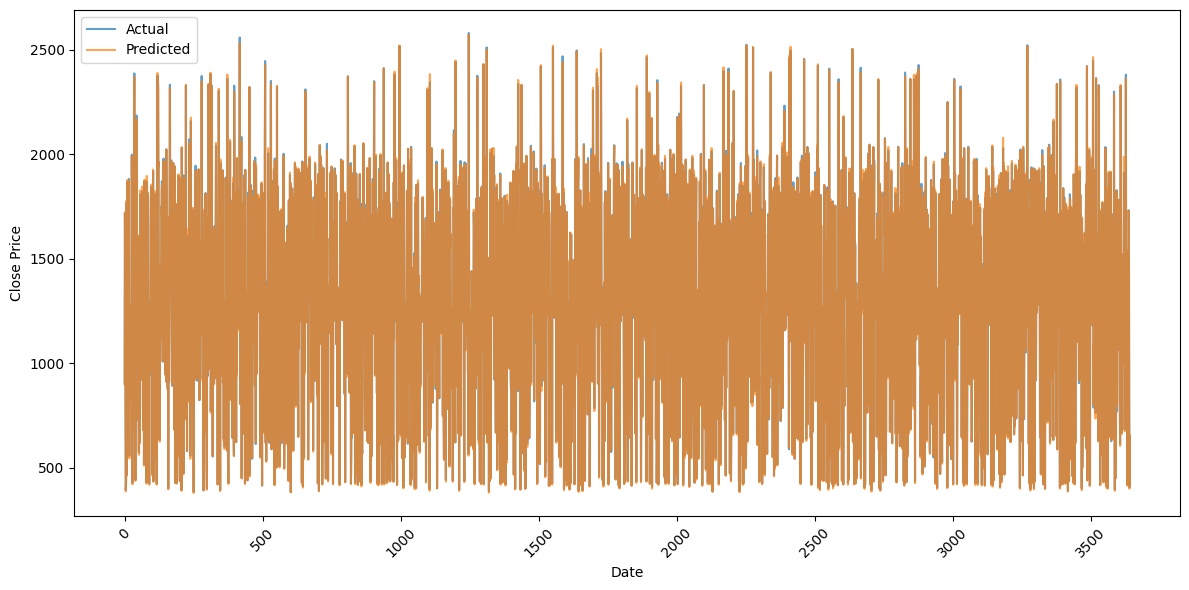

In [39]:
plot_predictions(transformer,X_train,y_train)